In [1]:
from google.colab import drive

# Monta Google Drive
drive.mount('/content/drive')

import pickle

# Percorso completo del file .pkl su Google Drive
file_path = "/content/drive/MyDrive/approximated_time_series_matrix.pkl"

# Carica l'oggetto dal file .pkl
with open(file_path, 'rb') as file:
    X = pickle.load(file)

Mounted at /content/drive


In [2]:
file_path2 = "/content/drive/MyDrive/dataframe.pkl"

# Carica l'oggetto dal file .pkl
with open(file_path2, 'rb') as file:
    df = pickle.load(file)


In [3]:
!pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.3/368.3 kB 8.0 MB/s eta 0:00:00


In [ ]:
%%time
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=3, random_state=0)
km.fit(X)

CPU times: user 13min 10s, sys: 55 s, total: 14min 5s
Wall time: 13min 48s


TimeSeriesKMeans(max_iter=3, metric='dtw', random_state=0)

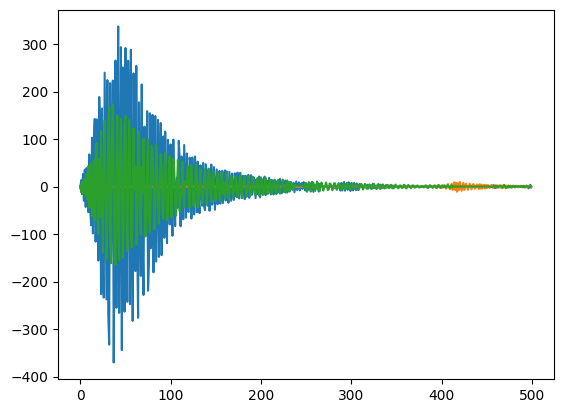

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

In [ ]:
#COMPRESSION BASED CLUSTERING
from sklearn.metrics import pairwise_distances
import zlib

In [ ]:
#431SECONDI / 7MINUTI
%%time
def cdm_dist(x, y):
    x_compressed = zlib.compress(x.tobytes())
    y_compressed = zlib.compress(y.tobytes())
    xy_compressed = zlib.compress(x.tobytes() + y.tobytes())

    return len(xy_compressed) / (len(x_compressed) + len(y_compressed))


M = pairwise_distances(X.reshape(X.shape[0], X.shape[1]), metric=cdm_dist)

CPU times: user 24min 55s, sys: 1.71 s, total: 24min 56s
Wall time: 25min 7s


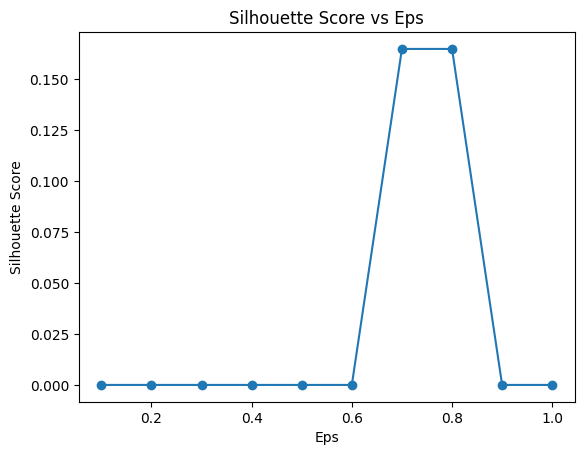

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Calcolo delle distanze tra le serie temporali
distances = M

# Valori di eps da testare
eps_values = np.linspace(0.1, 1.0, num=10)

# Lista per salvare le silhouette scores
silhouette_scores = []

# Esecuzione del DBSCAN per ogni valore di eps
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(distances)

    # Verifica se ci sono più di un cluster identificato
    if len(np.unique(labels)) > 1:
        # Calcolo della silhouette score
        score = silhouette_score(distances, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)  # Aggiungi valore 0 se viene identificato solo un cluster

# Plot della silhouette score rispetto ai valori di eps
plt.plot(eps_values, silhouette_scores, marker='o')
plt.xlabel('Eps')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Eps')
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=5, metric='precomputed')
dbscan.fit(M)

DBSCAN(eps=0.8, metric='precomputed')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


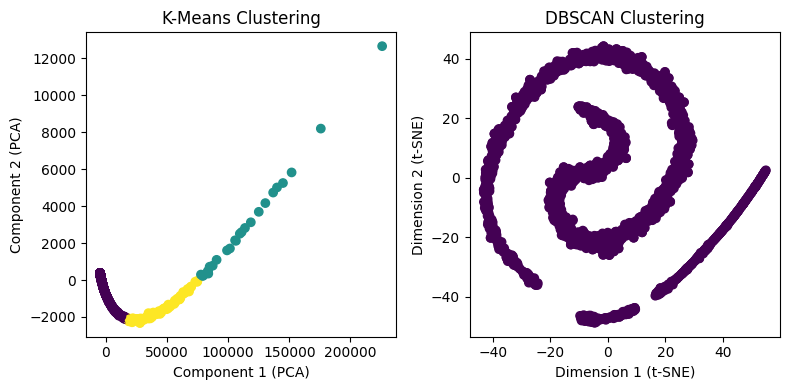

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.spatial.distance import euclidean

# Generate or load your time series data
time_series = X

# Compute the pairwise distance matrix using an appropriate distance measure
distances = np.zeros((len(time_series), len(time_series)))
for i in range(len(time_series)):
    for j in range(i+1, len(time_series)):
        distances[i, j] = distances[j, i] = euclidean(time_series[i], time_series[j])

# Perform clustering using K-Means
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(distances)

# Perform clustering using DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5, metric='precomputed')
dbscan_labels = dbscan.fit_predict(distances)

# Visualize the clusters using dimensionality reduction techniques
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

# Apply dimensionality reduction
pca_result = pca.fit_transform(distances)
tsne_result = tsne.fit_transform(distances)

# Plot the clusters using PCA
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels)
plt.xlabel('Component 1 (PCA)')
plt.ylabel('Component 2 (PCA)')
plt.title('K-Means Clustering')

# Plot the clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=dbscan_labels)
plt.xlabel('Dimension 1 (t-SNE)')
plt.ylabel('Dimension 2 (t-SNE)')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

CLASSIFICATION

In [ ]:
df

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,01,M,03-01-01-01-01-01-01.wav
1,audio-only,speech,neutral,normal,Kids are talking by the door,1st,02,F,03-01-01-01-01-01-02.wav
2,audio-only,speech,neutral,normal,Kids are talking by the door,1st,03,M,03-01-01-01-01-01-03.wav
3,audio-only,speech,neutral,normal,Kids are talking by the door,1st,04,F,03-01-01-01-01-01-04.wav
4,audio-only,speech,neutral,normal,Kids are talking by the door,1st,05,M,03-01-01-01-01-01-05.wav
...,...,...,...,...,...,...,...,...,...
2489,audio-only,song,fearful,strong,Dogs are sitting by the door,2nd,20,F,03-02-06-02-02-02-20.wav
2490,audio-only,song,fearful,strong,Dogs are sitting by the door,2nd,21,M,03-02-06-02-02-02-21.wav
2491,audio-only,song,fearful,strong,Dogs are sitting by the door,2nd,22,F,03-02-06-02-02-02-22.wav
2492,audio-only,song,fearful,strong,Dogs are sitting by the door,2nd,23,M,03-02-06-02-02-02-23.wav


In [4]:
y=df["vocal_channel"][:2452]

In [5]:
#KNN TIME SERIES CLASSIFIER con distanza euclidea
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric="euclidean")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5747282608695652
F1-score [0.33545648 0.68731269]
              precision    recall  f1-score   support

        song       0.45      0.27      0.34       296
      speech       0.61      0.78      0.69       440

    accuracy                           0.57       736
   macro avg       0.53      0.52      0.51       736
weighted avg       0.55      0.57      0.55       736



In [ ]:
#KNN TIME SERIES CLASSIFIER con distanza dtw
from tslearn.metrics import dtw
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric=dtw)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6399456521739131
F1-score [0.50834879 0.71596999]
              precision    recall  f1-score   support

        song       0.56      0.46      0.51       296
      speech       0.68      0.76      0.72       440

    accuracy                           0.64       736
   macro avg       0.62      0.61      0.61       736
weighted avg       0.63      0.64      0.63       736



In [7]:
#CNN TIME SERIES
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, Conv1D, BatchNormalization
import numpy as np


def build_simple_cnn(n_timesteps, n_outputs):
    model = Sequential()

    model.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(n_timesteps, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dropout(0.3))

    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dropout(0.3))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dropout(0.3))

    model.add(GlobalAveragePooling1D())

    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_cnn, y_train, test_size=0.2, stratify=y_train)

n_timesteps, n_outputs, n_features = X_train_cnn.shape[1], len(np.unique(y_train_cnn)), 1
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)

TIMESTEPS:  500
N. LABELS:  2


In [8]:
y_train = np.array([1 if label == "speech" else 0 for label in y_train])
from sklearn.preprocessing import LabelEncoder
y_train_cnn = np.array([1 if label == "speech" else 0 for label in y_train_cnn])
y_val_cnn = np.array([1 if label == "speech" else 0 for label in y_val_cnn])
y_test = np.array([1 if label == "speech" else 0 for label in y_test])

#y_: speech=1, song=0
cnn = build_simple_cnn(n_timesteps, n_outputs)


X_train_cnn = X_train_cnn.astype('float64')
y_train_cnn = y_train_cnn.astype('float64')

from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train_cnn.shape[0]/10, batch_size))

history_cnn = cnn.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn)).history



Epoch 1/5
86/86 [==============================] - 9s 74ms/step - loss: 0.7027 - accuracy: 0.5729 - val_loss: 0.7377 - val_accuracy: 0.5988 - lr: 0.0010
Epoch 2/5
86/86 [==============================] - 4s 49ms/step - loss: 0.6836 - accuracy: 0.5897 - val_loss: 0.6945 - val_accuracy: 0.5988 - lr: 0.0010
Epoch 3/5
86/86 [==============================] - 4s 47ms/step - loss: 0.6773 - accuracy: 0.6006 - val_loss: 0.6729 - val_accuracy: 0.6047 - lr: 0.0010
Epoch 4/5
86/86 [==============================] - 6s 66ms/step - loss: 0.6768 - accuracy: 0.6006 - val_loss: 0.6939 - val_accuracy: 0.5988 - lr: 0.0010
Epoch 5/5
86/86 [==============================] - 4s 50ms/step - loss: 0.6750 - accuracy: 0.5940 - val_loss: 0.7113 - val_accuracy: 0.5988 - lr: 0.0010


In [11]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.2/118.2 kB 15.3 MB/s eta 0:00:00


In [9]:
y_pred = np.argmax(cnn.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

23/23 [==============================] - 0s 14ms/step
Accuracy 0.5978260869565217
F1-score [0.         0.74829932]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       296
           1       0.60      1.00      0.75       440

    accuracy                           0.60       736
   macro avg       0.30      0.50      0.37       736
weighted avg       0.36      0.60      0.45       736



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sktime.classification.interval_based import CanonicalIntervalForest

clf = CanonicalIntervalForest(n_estimators=30)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.46      0.56       296
           1       0.71      0.88      0.78       440

    accuracy                           0.71       736
   macro avg       0.71      0.67      0.67       736
weighted avg       0.71      0.71      0.69       736

